In [46]:
from funcs.notebook import *

from altaipony.lcio import from_mast
from funcs.detrend import custom_detrending, estimate_detrended_noise

from matplotlib.ticker import FormatStrFormatter

path = "/home/ekaterina/Documents/002_writing/aumic-flaring-spi-draft/figures"

In [2]:
lc = from_mast("AU Mic",mission="TESS", c=1,cadence="short")[0]

/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/keyring-21.2.0-py3.6.egg/keyring/backend.py:199: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  entry_points = metadata.entry_points()['keyring.backends']
/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/lightkurve/io/tess.py:34: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/.lightkurve-cache/mastDownload/TESS/tess2018206045859-s0001-0000000441420236-0120-s/tess2018206045859-s0001-0000000441420236-0120-s_lc.fits' mode='rb' closefd=True>
  lc = read_generic_lightcurve(filename, flux_column=flux_column, time_format="btjd")
5% (982/19261) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
5% (982/19261) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/lightkurve/io/tasoc.py:26: ResourceWarning: unc

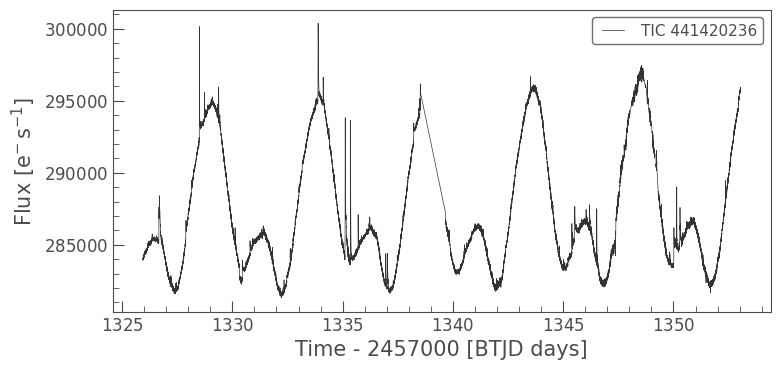

In [3]:
%matplotlib inline
lc.plot()

/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


0.03052499999999725 3.4780990000000003 1.3135010000000023 1.3075919999999996 1.299213999999992 1.3825300000000027 8.811460999999994


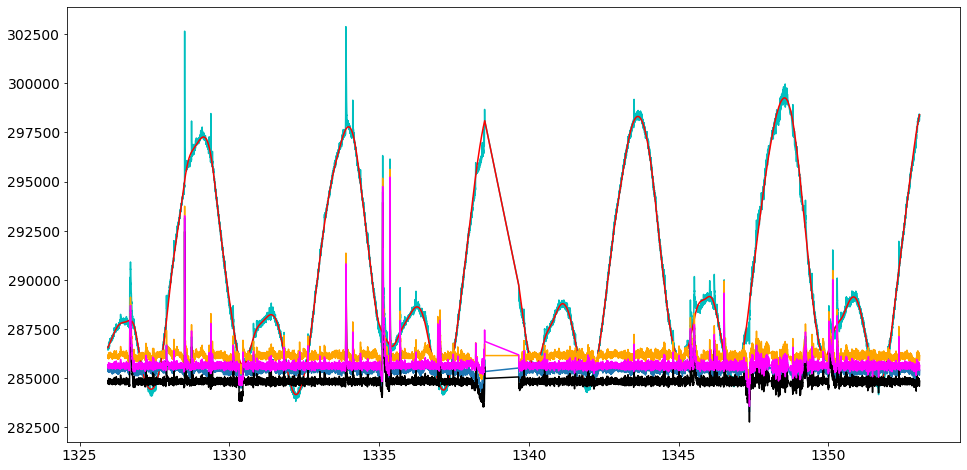

In [30]:
%matplotlib inline
flcc = custom_detrending(lc, spline_order=3, spline_coarseness=6,)

In [34]:
# Use the final vetted flares
ff = pd.read_csv("../results/2021_02_18_AUMic_flares_1.csv")
ff = ff[(ff.final==1) & (ff["real?"]==1)].sort_values(by="tstart", ascending=True)

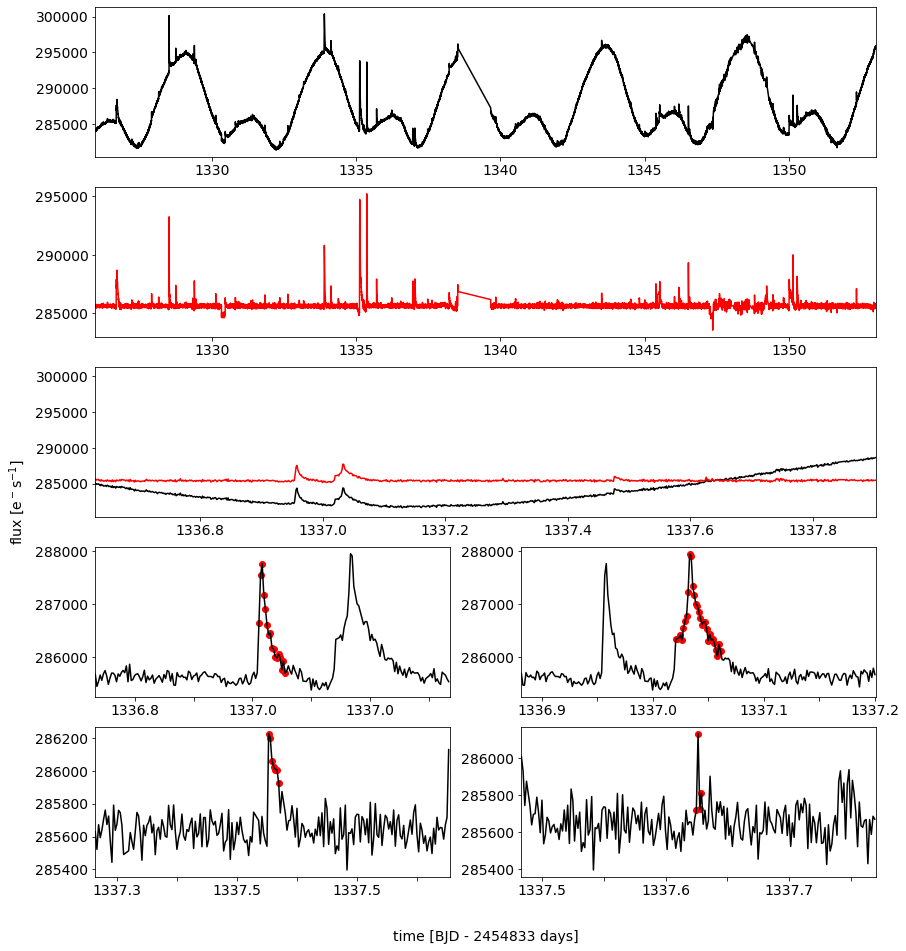

In [52]:
%matplotlib inline
fig = plt.figure(figsize=(14,16))
# 
ax = fig.add_subplot(5,2,(1,2))
ax.plot(lc.time.value, lc.flux.value, c="k")
ax.set_xlim(flcc.time.value[0], flcc.time.value[-1])

ax = fig.add_subplot(5,2,(3,4))
ax.plot(flcc.time.value, flcc.detrended_flux.value, c="r")
ax.set_xlim(flcc.time.value[0], flcc.time.value[-1])

ax = fig.add_subplot(5,2,(5,6))
ax.plot(lc.time.value, lc.flux.value, c="k")
ax.plot(flcc.time.value, flcc.detrended_flux.value -200, c="r")
ax.set_xlim(flcc.time.value[7600], flcc.time.value[8500])

x=0
off =100
for i, r in ff.iloc[35:39].iterrows():
    ax = fig.add_subplot(5,2,7+x)
    s,f = np.argmin(np.abs(r.tstart-flcc.time.value)), np.argmin(np.abs(r.tstop-flcc.time.value))
    
    ax.scatter(flcc.time.value[s:f],flcc.detrended_flux.value[s:f],c="r")
    ax.plot(flcc.time.value[s-off:f+off],flcc.detrended_flux.value[s-off:f+off],c="k")
    ax.set_xlim(flcc.time.value[s-off], flcc.time.value[f+off])
    ax.ticklabel_format(style="scientific", useOffset=False, axis="x")
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    x +=1

    
# Axis labels    
ax = fig.add_subplot(5,2,(9,10))

ax.text(0.5, -.4, 'time [BJD - 2454833 days]',
        fontsize=14, 
        horizontalalignment='center',
        verticalalignment='center', 
        transform=ax.transAxes)

ax.text(-.1, 2.5, r"flux [e$^-$s$^{-1}$]",
        fontsize=14, 
        horizontalalignment='center',
        verticalalignment='center', 
        transform=ax.transAxes, 
        rotation="vertical")
ax.axis("off")
# --------------------------------------    
    
plt.xlabel('time [BJD - 2457000 days]',fontsize=14)
plt.savefig(f"{path}/aumic_illustrate_flares.png",dpi=300)

# More for the Appendix

In [ ]:

lc = from_mast("Kepler-1651",mission="Kepler", c=14,cadence="short")
lc

In [ ]:
lc=lc[0]

In [ ]:
flcc = custom_detrending(lc)

In [ ]:
w = np.floor(1. / 12. / np.nanmin(np.diff(flcc.time)))
if w%2==0: 
    w+=1

# use window to estimate the noise in the LC
df = estimate_detrended_noise(flcc, std_window=int(w), mask_pos_outliers_sigma=2.5)

# search the residual for flares
ff = df.find_flares(addtail=True).flares

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(14,16))

ax = fig.add_subplot(5,2,(1,2))
ax.plot(lc.time, lc.flux, c="k")
ax.set_xlim(flcc.time[0], flcc.time[-1])

ax = fig.add_subplot(5,2,(3,4))
ax.plot(flcc.time, flcc.detrended_flux, c="r")
ax.set_xlim(flcc.time[0], flcc.time[-1])

ax = fig.add_subplot(5,2,(5,6))
ax.plot(lc.time, lc.flux, c="k")
ax.plot(flcc.time, flcc.detrended_flux -200, c="r")
ax.set_xlim(flcc.time[0], flcc.time[13300])

#ax[1].plot(flcc.time, flcc.detrended_flux, c="r",zorder=-10)
# ax.set_xlim(flcc.time[6800], flcc.time[9300])
# plt.tight_layout()
# plt.xlabel('time [BJD - 2457000 days]',fontsize=14)
x=0
off =100
for i, r in ff.iloc[:4].iterrows():
    ax = fig.add_subplot(5,2,7+x)
    s,f = r.istart, r.istop 
    
    ax.scatter(flcc.time[s:f],flcc.detrended_flux[s:f],c="r")
    ax.plot(flcc.time[s-off:f+off],flcc.detrended_flux[s-off:f+off],c="k")
    ax.set_xlim(flcc.time[s-off], flcc.time[f+off])
    x +=1
# for a in ax:
#     a.set_ylabel(r"flux [e$^-$s$^{-1}$]",fontsize=14);
# ax[1].set_ylim(3550,3650)
ax = fig.add_subplot(5,2,(9,10))

ax.text(0.5,-.4,'time [BJD - 2454833 days]',fontsize=14, horizontalalignment='center',
        verticalalignment='center', transform=ax.transAxes)
ax.text(-.1,2.5,r"flux [e$^-$s$^{-1}$]",fontsize=14, horizontalalignment='center',
        verticalalignment='center', transform=ax.transAxes, rotation="vertical")
ax.axis("off")
# plt.savefig(f"{path}/illustrate_flares.png",dpi=300)

(array([7., 6., 1., 4., 1., 0., 4., 2., 1., 2., 3., 0., 0., 0., 0., 2.]),
 array([0.00126925, 0.05823559, 0.11520193, 0.17216827, 0.2291346 ,
        0.28610094, 0.34306728, 0.40003362, 0.45699996, 0.5139663 ,
        0.57093264, 0.62789898, 0.68486532, 0.74183166, 0.79879799,
        0.85576433, 0.91273067]),
 <a list of 16 Patch objects>)

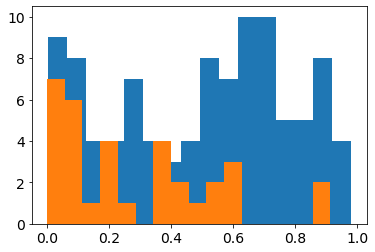

In [95]:
x = [0.001269249059388
,0.003088611338036
,0.048227449620437
,0.057452023463273
,0.075338788110049
,0.088132934441307
,0.110867423030469
,0.111072271676312
,0.124216681168309
,0.190329335305143
,0.190691852101291
,0.214673409774438
,0.225476369508041
,0.281274469481258
,0.35041954092521
,0.385690346850196
,0.41181807248138
,0.440075007894817
,0.527784966413564
,0.576951979690033
,0.622693869099901
,0.866225554693617
,0.912730672442452
,0.384310061501383
,0.379705055448079
,0.074944906175223
,0.574855962223753
,0.532811398460614
,0.045833891536345
,0.049344015468436
,0.096714922292701
,0.050464644049232
,0.469473506421078]
#np.logspace(-3,1,30))
plt.hist(Ps, bins=16)
plt.hist(x, bins=16)
# plt.xscale("log")

In [91]:
from scipy.stats import ks_1samp
from scipy import interpolate
random = np.random.rand(94)

g = lambda x: x

x = np.linspace(0,1,30)
g = x
f = interpolate.interp1d(x, g)
Ps = []


Ps = [ks_1samp(np.random.rand(94), f)[1] for i in range(100)]

Ps

[0.924520264972791,
 0.32146895367610806,
 0.5591161075887623,
 0.506602807952404,
 0.13995864314223727,
 0.7400775225139145,
 0.28907405652332135,
 0.11762005596034199,
 0.7498974593953661,
 0.6752288224339085,
 0.9790298106368566,
 0.8909103785257819,
 0.89771071880962,
 0.5943114845516556,
 0.3894194979490182,
 0.409721230147352,
 0.9107692524324911,
 0.9353182134012252,
 0.014798171353194481,
 0.1892866545418729,
 0.8720642436533333,
 0.8685142040888758,
 0.852389507759033,
 0.21298419659404158,
 0.8202644884279326,
 0.33059515023180086,
 0.5678612976418882,
 0.7846510669094987,
 0.8996812161410166,
 0.09315419666958817,
 0.6570156595499894,
 0.45817360928767537,
 0.6433917498825943,
 0.11676929374675984,
 0.6869900804858897,
 0.0262638818548824,
 0.3450347936048748,
 0.5831097865153568,
 0.6496561608421332,
 0.8362573895232404,
 0.7311733562866624,
 0.6155863666625775,
 0.8814839817430324,
 0.007004670476884564,
 0.30462967782257666,
 0.3513143018139283,
 0.03842711224321357,
 0.7

In [57]:
d1 = np.random.normal(0,4,100)
d2 = np.random.normal(0,4,100)
d = np.concatenate([d1,d2]) 
d.std()

4.003511404305051